In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import EstimationMethods
import WindowEstimation
from matplotlib.gridspec import GridSpec
import time

plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 17})
plt.rcParams['text.usetex'] = True

descriptions = ["precip_mm_srf", "fracPFTs_mm_srf", "sm_mm_soil", "temp_mm_1_5m"]


data_start = 100
data_end = 4500
analysis_start = 0
analysis_end = 3400
real_start = -9000
real_end = real_start+data_end-data_start
real_analysis_end=real_start+analysis_end
leap = 100
windowsize = 1000

vegetation = pd.read_csv("seasonal_west_data_"+descriptions[1], index_col = 0).values.flatten()[data_start:data_end]
precipitation = pd.read_csv("seasonal_west_data_"+descriptions[0], index_col = 0).values.flatten()[data_start:data_end]

result_veg = np.transpose(WindowEstimation.moving_window(vegetation[analysis_start:analysis_end],method="psd", windowsize=windowsize, leap = leap, initial=[0.1,1,1],return_all_params=True))
result_precip = np.transpose(WindowEstimation.moving_window(10000*precipitation[analysis_start:analysis_end],method="psd", windowsize=windowsize, leap = leap, initial=[0.1,1,1],return_all_params=True))

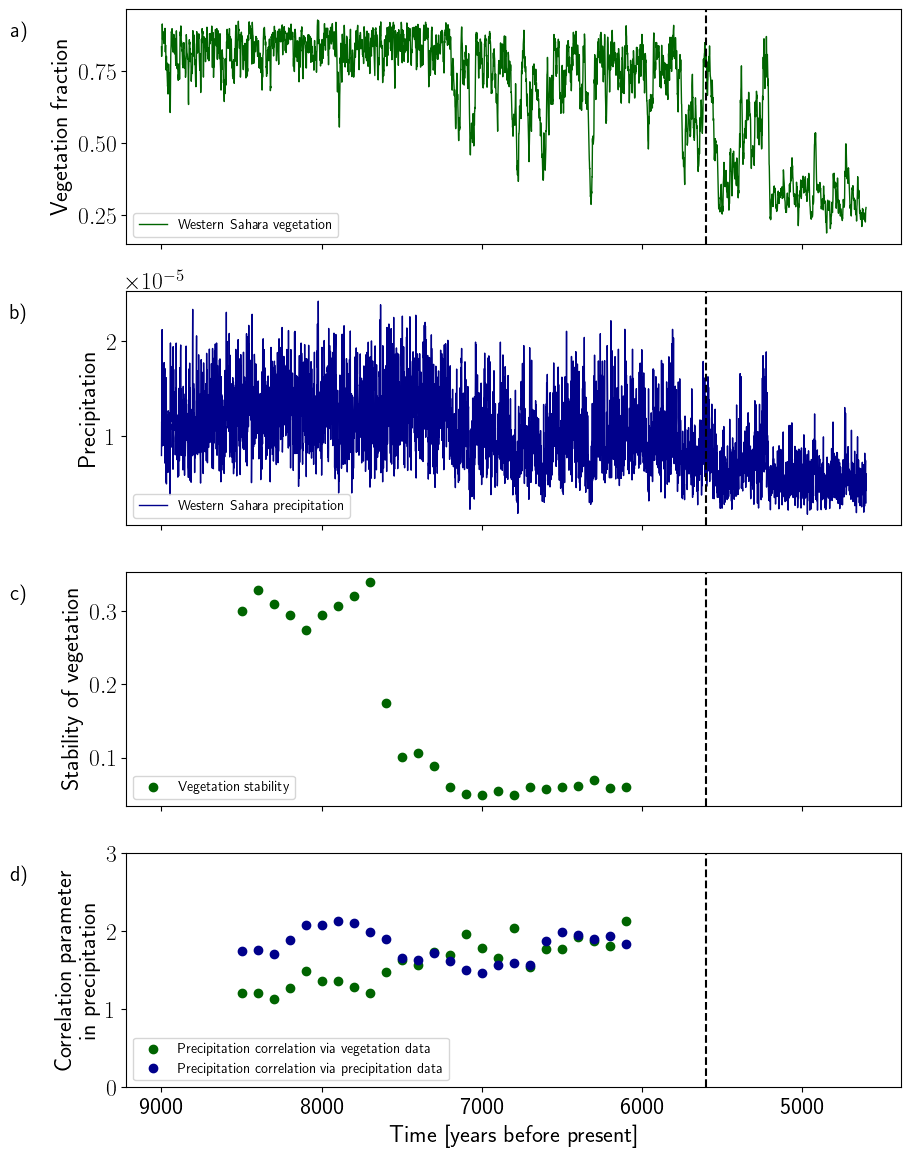

In [12]:
fig, axs = plt.subplots(4,1, figsize=(10, 14),sharex=True)
props = dict(edgecolor="none", facecolor='white', alpha=0)

axs[0].plot(range(real_start,real_end),vegetation, linewidth=1,c="darkgreen")
axs[0].set_ylabel("Vegetation fraction")
axs[0].text(-0.15, 0.95, "a)", transform=axs[0].transAxes, fontsize=15, verticalalignment='top', bbox=props)
axs[0].axvline(real_analysis_end, linestyle = "dashed", color = "black")
axs[0].legend(["Western Sahara vegetation"],fontsize=10,loc="lower left")

axs[1].plot(range(real_start,real_end),precipitation, linewidth=1,c="darkblue")
axs[1].set_ylabel("Precipitation")
axs[1].text(-0.15, 0.95, "b)", transform=axs[1].transAxes, fontsize=15, verticalalignment='top', bbox=props)
axs[1].axvline(real_analysis_end, linestyle = "dashed", color = "black")
axs[1].legend(["Western Sahara precipitation"],fontsize=10,loc="lower left")

axs[2].scatter(range(real_start+round(windowsize/2),real_analysis_end-round(windowsize/2)+leap,leap),result_veg[0], linewidth=1,c="darkgreen")
axs[2].set_ylabel("Stability of vegetation")
axs[2].text(-0.15, 0.95, "c)", transform=axs[2].transAxes, fontsize=15, verticalalignment='top', bbox=props)
axs[2].axvline(real_analysis_end, linestyle = "dashed", color = "black")
axs[2].legend(["Vegetation stability"],fontsize=10,loc="lower left")

axs[3].scatter(range(real_start+round(windowsize/2),real_analysis_end-round(windowsize/2)+leap,leap),result_veg[1], linewidth=1,c="darkgreen")
axs[3].scatter(range(real_start+round(windowsize/2),real_analysis_end-round(windowsize/2)+leap,leap),result_precip[0], linewidth=1,c="darkblue")
axs[3].set_ylabel("Correlation parameter\nin precipitation")
axs[3].axvline(real_analysis_end, linestyle = "dashed", color = "black")
axs[3].set_ylim([0,3])
axs[3].text(-0.15, 0.95, "d)", transform=axs[3].transAxes, fontsize=15, verticalalignment='top', bbox=props)
axs[3].set_xlabel("Time [years before present]")
axs[3].set_xticks([-9000,-8000,-7000,-6000,-5000],[9000,8000,7000,6000,5000])
axs[3].legend(["Precipitation correlation via vegetation data","Precipitation correlation via precipitation data"],fontsize=10,loc="lower left")

#plt.savefig("VegPrec" + time.strftime("%Y%m%d-%H%M%S"), dpi = 300, bbox_inches='tight')
plt.show()

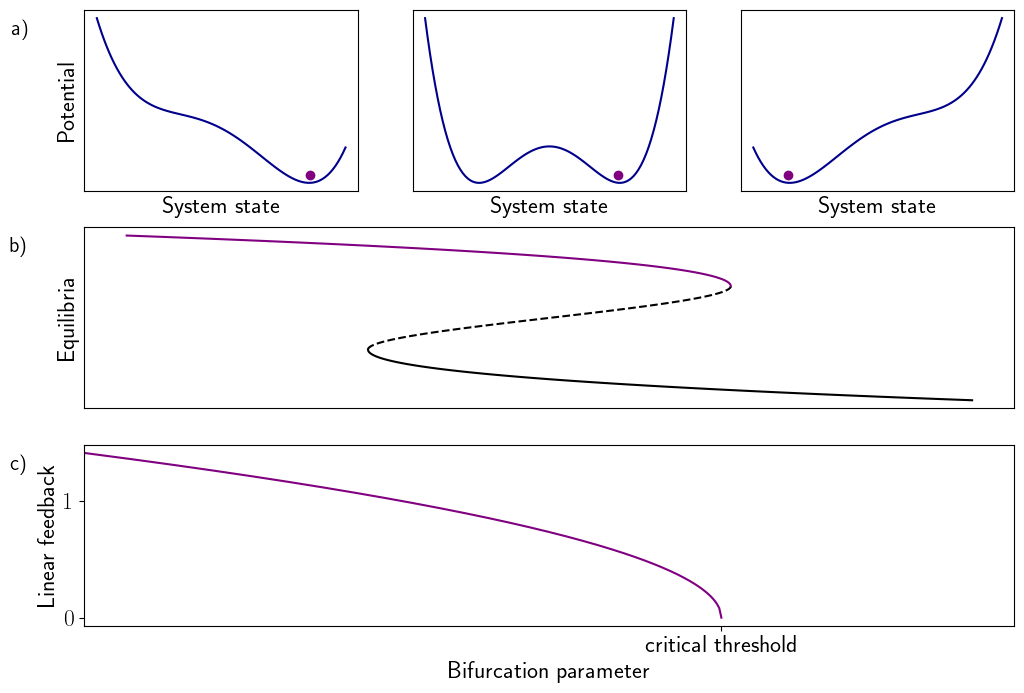

In [3]:
fig = plt.figure(figsize=(12, 8))

gs = GridSpec(3, 3, figure=fig)
bifplt = fig.add_subplot(gs[1,:])
lambdaplt = fig.add_subplot(gs[2,:])
dT1plt = fig.add_subplot(gs[0,0])
dT2plt = fig.add_subplot(gs[0,1])
dT3plt = fig.add_subplot(gs[0,2])

props = dict(edgecolor="none", facecolor='white', alpha=0)
bifplt.plot([-x*(x-1)*(x+1) for x in np.linspace(-1.3,-1/(3**0.5),100)],np.linspace(-1.3,-0.5,100),c="black")
bifplt.plot([-x*(x-1)*(x+1) for x in np.linspace(-1/(3**0.5),1/(3**0.5),100)],np.linspace(-0.5,0.5,100),linestyle="dashed",c="black")
bifplt.plot([-x*(x-1)*(x+1) for x in np.linspace(1/(3**0.5),1.3,100)],np.linspace(0.5,1.3,100),c="purple")
bifplt.set_xticks([])
bifplt.set_yticks([])
bifplt.set_ylabel("Equilibria")
bifplt.text(-0.08, 0.95, "b)", transform=bifplt.transAxes, fontsize=15, verticalalignment='top', bbox=props)


lambdaplt.plot(np.linspace(-2,0,300),[np.sqrt(-x) for x in np.linspace(-2,0,300)],c="purple")
lambdaplt.set_xlim([-2,0.92])
lambdaplt.set_xlabel("Bifurcation parameter")
lambdaplt.set_ylabel("Linear feedback")
lambdaplt.set_xticks([0],["critical threshold"])
lambdaplt.text(-0.08, 0.95, "c)", transform=lambdaplt.transAxes, fontsize=15, verticalalignment='top', bbox=props)

dT1plt.plot([0.25*x**4-1*x**2-2*x for x in np.linspace(-2.5,2.5,100)], color = "darkblue")
dT1plt.scatter([85],[-3.6], color = "purple")
dT1plt.set_yticks([])
dT1plt.set_xticks([])
dT1plt.set_xlabel("System state")
dT1plt.set_ylabel("Potential")
dT1plt.text(-0.27, 0.95, "a)", transform=dT1plt.transAxes, fontsize=15, verticalalignment='top', bbox=props)
dT2plt.plot([0.25*x**4-1*x**2+0*x for x in np.linspace(-2.5,2.5,100)], color = "darkblue")
dT2plt.scatter([77],[-0.78], color = "purple")
dT2plt.set_yticks([])
dT2plt.set_xticks([])
dT2plt.set_xlabel("System state")
dT3plt.plot([0.25*x**4-1*x**2+2*x for x in np.linspace(-2.5,2.5,100)], color = "darkblue")
dT3plt.scatter([14],[-3.6], color = "purple")
dT3plt.set_yticks([])
dT3plt.set_xticks([])
#d3Tplt.set_ylabel(r"Rate of Temperatur change $\frac{dT}{dt}$")
dT3plt.set_xlabel("System state")
#dTplt.legend([r"Rate of Temperatur change $\frac{dT}{dt}$","Corresponding potential $V(T)$"])
#plt.savefig("BifPot" + time.strftime("%Y%m%d-%H%M%S"), dpi = 300, bbox_inches='tight')
plt.show()